<a href="https://colab.research.google.com/github/teamgaon/recommendation_algorithms_know/blob/main/20220114_hj_know_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install optuna

     |████████████████████████████████| 308 kB 7.5 MB/s 
     |████████████████████████████████| 80 kB 10.8 MB/s 
     |████████████████████████████████| 209 kB 65.9 MB/s 
     |████████████████████████████████| 75 kB 5.5 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 149 kB 65.7 MB/s 
     |████████████████████████████████| 112 kB 63.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=6108e2112ad4c299a2294ec882b338a4842f35bd1a0592e20b01c59eda718679
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
import optuna
import warnings
import gc
import os
import random
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from datetime import datetime
from glob import glob
from tqdm import tqdm
from IPython.display import Image

In [3]:
# 추후에 경고 값들을 출력하지 않도록 'ignore'상태로 만들어 준다.
# 불필요한 경고창이 더 이상 출력 되지 않게 됩니다.
warnings.filterwarnings(action = 'ignore')

In [4]:
train_2017 = []
train_2018 = []
train_2019 = []
train_2020 = []

for i, path in enumerate(sorted(glob("/content/drive/MyDrive/KNOW_data/train/*.csv"))):
    print(path)
    if i == 0:
        train_2017 = pd.read_csv(path)
        pass
    elif i==1:
        train_2018 = pd.read_csv(path)
        pass
    elif i==2:
        train_2019 = pd.read_csv(path)
        pass
    else:
        train_2020 = pd.read_csv(path)
        pass
    
test_2017 = []
test_2018 = []
test_2019 = []
test_2020 = []

for i, path in enumerate(sorted(glob("/content/drive/MyDrive/KNOW_data/test/*.csv"))):
    print(path)
    
    if i == 0:
        test_2017 = pd.read_csv(path)
        pass
    elif i==1:
        test_2018 = pd.read_csv(path)
        pass
    elif i==2:
        test_2019 = pd.read_csv(path)
        pass
    else:
        test_2020 = pd.read_csv(path)
        pass

/content/drive/MyDrive/KNOW_data/train/KNOW_2017.csv
/content/drive/MyDrive/KNOW_data/train/KNOW_2018.csv
/content/drive/MyDrive/KNOW_data/train/KNOW_2019.csv
/content/drive/MyDrive/KNOW_data/train/KNOW_2020.csv
/content/drive/MyDrive/KNOW_data/test/KNOW_2017_test.csv
/content/drive/MyDrive/KNOW_data/test/KNOW_2018_test.csv
/content/drive/MyDrive/KNOW_data/test/KNOW_2019_test.csv
/content/drive/MyDrive/KNOW_data/test/KNOW_2020_test.csv


In [5]:
train_2018.loc[3064]

idx          12555
cq1              5
cq2              1
cq3              5
cq4              5
             ...  
bq40              
bq41_1            
bq41_2        4000
bq41_3         NaN
knowcode    415404
Name: 3064, Length: 141, dtype: object

In [6]:
# 데이터에 결측치 값이 ' ' 기준으로 나타난다고 하지만 
# 실제 데이터에서 np.nan 값이 일부 포함되어 있는 것이 보인다.
# 나머지 ' ' 바로 구성된 결측치 값들을 모두 np.nan 값으로 변형해준다.
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

In [7]:
# 결측치 값 확인을 편하게 하기 위해서 모두 np.nan 값으로 변형해 준다.
# test_2018에 있는 모든 columns들을 불러온다.
for col in test_2018:
    
    # idx 값에는 별도의 결측치 값이 존재하지 않기 때문에 건너뛴다.
    if col == 'idx':
        continue
        
    train_2018.replace(' ', np.nan, inplace = True)
    test_2018.replace(' ', np.nan, inplace = True)

In [8]:
have_nan_columns = []
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")
    if (value > 0) | (tvalue > 0):
        have_nan_columns.append(index)

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

##### 1.2 결측치를 갖고 있는 칼럼들

In [9]:
have_nan_columns

['bq4',
 'bq4_1a',
 'bq4_1b',
 'bq4_1c',
 'bq5',
 'bq5_1',
 'bq5_2',
 'bq12_1',
 'bq12_2',
 'bq12_3',
 'bq12_4',
 'bq21',
 'bq221',
 'bq222',
 'bq223',
 'bq231',
 'bq234',
 'bq235',
 'bq241',
 'bq242',
 'bq243',
 'bq244',
 'bq245',
 'bq25',
 'bq25_1',
 'bq26_1',
 'bq26_1a',
 'bq26_2',
 'bq26_2a',
 'bq26_3',
 'bq26_3a',
 'bq26_4',
 'bq26_4a',
 'bq28_1',
 'bq29',
 'bq30',
 'bq31',
 'bq32',
 'bq33',
 'bq36',
 'bq37',
 'bq37_1',
 'bq38',
 'bq38_1',
 'bq38_2',
 'bq39',
 'bq40',
 'bq41_1',
 'bq41_2',
 'bq41_3']

##### 1.3 bq4에 대한 결측치 처리 방법

In [10]:
display(train_2018.loc[(train_2018['bq4'].isnull()), ['bq4','bq4_1a', 'bq4_1b', 'bq4_1c']])
display(test_2018.loc[(test_2018['bq4'].isnull()), ['bq4','bq4_1a', 'bq4_1b', 'bq4_1c']])

,bq4,bq4_1a,bq4_1b,bq4_1c
1253,NaN,NaN,NaN,1
1628,NaN,NaN,NaN,2
2938,NaN,NaN,NaN,1
3505,NaN,NaN,NaN,2
4478,NaN,NaN,NaN,1
4718,NaN,NaN,NaN,2
4884,NaN,NaN,NaN,2
5292,NaN,NaN,NaN,2
5433,NaN,NaN,NaN,2
6512,NaN,NaN,NaN,1


,bq4,bq4_1a,bq4_1b,bq4_1c
86,NaN,NaN,NaN,2
87,NaN,NaN,NaN,1
663,NaN,NaN,NaN,1
1171,NaN,NaN,NaN,1
1423,NaN,NaN,NaN,1
2050,NaN,NaN,NaN,2
2761,NaN,NaN,NaN,2
3141,NaN,NaN,NaN,2
3221,NaN,NaN,NaN,1
4756,NaN,NaN,NaN,1


1.3.1 bq4_1c값에 1 or 2 값을 갖고 있는 사람들에 대한 조사

In [11]:
if '1' in list(train_2018['bq4_1a'].unique()):
    print("1이 bq4_1a에 존재한다.")

if '2' in list(train_2018['bq4_1a'].unique()):
    print("2가 bq4_1a에 존재한다.")    
    
if '1' in list(train_2018['bq4_1b'].unique()):
    print("1이 bq4_1b에 존재한다.")

if '2' in list(train_2018['bq4_1b'].unique()):
    print("2가 bq4_1b에 존재한다.")            
    
if '1' in list(test_2018['bq4_1a'].unique()):
    print("1이 bq4_1a에 존재한다.")

if '2' in list(test_2018['bq4_1a'].unique()):
    print("2가 bq4_1a에 존재한다.")    
    
if '1' in list(train_2018['bq4_1b'].unique()):
    print("1이 bq4_1b에 존재한다.")

if '2' in list(train_2018['bq4_1b'].unique()):
    print("2가 bq4_1b에 존재한다.")     

In [12]:
display(train_2018[((train_2018['bq4_1c'] == '1') | (train_2018['bq4_1c'] == '2')) & (train_2018['bq4'].notnull())][['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']])
display(test_2018[((test_2018['bq4_1c'] == '1') | (test_2018['bq4_1c'] == '2')) & (test_2018['bq4'].notnull())][['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']])

train_indexs = train_2018[((train_2018['bq4_1c'] == '1') | (train_2018['bq4_1c'] == '2')) & (train_2018['bq4'].notnull())][['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']].index
test_indexs = test_2018[((test_2018['bq4_1c'] == '1') | (test_2018['bq4_1c'] == '2')) & (test_2018['bq4'].notnull())][['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']].index

,bq4,bq4_1a,bq4_1b,bq4_1c
456,전기기사,NaN,NaN,1
1548,금속재료시험 기능사,NaN,NaN,2
1946,전기철도기사,전기기사,전기공사기사,1
4000,제강기능사,지게차,NaN,1
4076,제강기능사,지게차자격증,NaN,1
4254,전기기사,NaN,NaN,2
5574,전기기사,NaN,NaN,1
5784,전기기사,NaN,NaN,1
5902,열처리기능사,NaN,NaN,1
6094,전기기사,NaN,NaN,1


,bq4,bq4_1a,bq4_1b,bq4_1c
357,전기기사,NaN,NaN,1
381,전기기사,NaN,NaN,1
805,전기기사,NaN,NaN,1
1289,전기관련,NaN,NaN,1
3311,전기기사,NaN,NaN,2
3911,전기기사,전기산업기사,전기철도기술사,1
4492,전기기사,철도기사,안전,2
4978,전기기사,전기공사기사,NaN,1
5186,전기기사,NaN,NaN,1
6039,전기기사,NaN,NaN,1


1.3.3 bq4 ~ bq4_1c 칼럼 올바르게 수정

In [13]:
def modify_bq4_to_1c(data):
    for index in data[(data['bq4_1c'] == '1') | (data['bq4_1c'] == '2')].index:
        if data.loc[index, ['bq4']].isnull()[0]:
            # 'bq4' 칼럼에 있는 값이 결측치 값일 경우
            # 칼럼에 해당하는 값이 결측치 값일 경우는 'bq4'에 해당하는 갑셍는 '2'로 설정
            # 나머지 'bq4_1a' ~ 'bq4_1c'에 해당하는 값에는 '없음' 으로 바꿔 준다.
            
            # 해당하는 자격증이 없기 때문에 '2'로 바꿔준다.
            data.loc[index, 'bq4'] = '2'
            
            # 'bq4_1a' 칼럼을 '없음' 으로 바꿔준다.
            data.loc[index, 'bq4_1a'] = '없음'
            
            # 'bq4_1b' 칼럼을 '없음' 으로 바꿔준다.
            data.loc[index, 'bq4_1b'] = '없음'
            
            # 'bq4_1c' 칼럼을 '없음' 으로 바꿔준다.
            data.loc[index, 'bq4_1c'] = '없음'
            pass
        else:
            # 'bq4' 칼럼에 있는 값이 결측치 값이 아닐 경우
            if (data.loc[index, ['bq4_1a']].isnull()[0]) & (train_2018.loc[index, ['bq4_1b']].isnull()[0]):
                # 'bq4_1a'와 'bq4_1b' 값이 모두 결측치 값일 경우이다.
                data.loc[index, 'bq4_1a'] = data.loc[index, 'bq4']
                data.loc[index, 'bq4'] = '1'
                data.loc[index, 'bq4_1c'] = np.nan
                pass
            elif data.loc[index, ['bq4_1b']].isnull()[0]:
                data.loc[index, 'bq4_1c'] = data.loc[index, 'bq4_1b']
                data.loc[index, 'bq4_1b'] = data.loc[index, 'bq4_1a']
                data.loc[index, 'bq4_1a'] = data.loc[index, 'bq4']
                data.loc[index, 'bq4'] = '1'
                pass
            else:
                data.loc[index, 'bq4_1c'] = data.loc[index, 'bq4_1b']
                data.loc[index, 'bq4_1b'] = data.loc[index, 'bq4_1a']
                data.loc[index, 'bq4_1a'] = data.loc[index, 'bq4']
                data.loc[index, 'bq4'] = '1'

modify_bq4_to_1c(train_2018)            
modify_bq4_to_1c(test_2018)

1.3.2 bq4 ~ bq4_1c 칼럼들이 올바르게 수정되었음

In [14]:
display(train_2018.loc[train_indexs, ['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']])
display(test_2018.loc[test_indexs, ['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']])

,bq4,bq4_1a,bq4_1b,bq4_1c
456,1,전기기사,NaN,NaN
1548,1,금속재료시험 기능사,NaN,NaN
1946,1,전기철도기사,전기기사,전기공사기사
4000,1,제강기능사,지게차,NaN
4076,1,제강기능사,지게차자격증,NaN
4254,1,전기기사,NaN,NaN
5574,1,전기기사,NaN,NaN
5784,1,전기기사,NaN,NaN
5902,1,열처리기능사,NaN,NaN
6094,1,전기기사,NaN,NaN


,bq4,bq4_1a,bq4_1b,bq4_1c
357,1,전기기사,NaN,NaN
381,1,전기기사,NaN,NaN
805,1,전기기사,NaN,NaN
1289,1,전기관련,NaN,NaN
3311,1,전기기사,NaN,NaN
3911,1,전기기사,전기산업기사,전기철도기술사
4492,1,전기기사,철도기사,안전
4978,1,전기기사,전기공사기사,NaN
5186,1,전기기사,NaN,NaN
6039,1,전기기사,NaN,NaN


1.3.3 bq4 ~ bq4_1c 칼럼들에 있는 결측치 값들을 '없음'으로 바꿔줌

In [15]:
# 결측치 값을 없음으로 바꿔준다.
for col in ['bq4_1a', 'bq4_1b', 'bq4_1c']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)

In [16]:
display(train_2018.loc[train_indexs, ['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']])
display(test_2018.loc[test_indexs, ['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']])

,bq4,bq4_1a,bq4_1b,bq4_1c
456,1,전기기사,없음,없음
1548,1,금속재료시험 기능사,없음,없음
1946,1,전기철도기사,전기기사,전기공사기사
4000,1,제강기능사,지게차,없음
4076,1,제강기능사,지게차자격증,없음
4254,1,전기기사,없음,없음
5574,1,전기기사,없음,없음
5784,1,전기기사,없음,없음
5902,1,열처리기능사,없음,없음
6094,1,전기기사,없음,없음


,bq4,bq4_1a,bq4_1b,bq4_1c
357,1,전기기사,없음,없음
381,1,전기기사,없음,없음
805,1,전기기사,없음,없음
1289,1,전기관련,없음,없음
3311,1,전기기사,없음,없음
3911,1,전기기사,전기산업기사,전기철도기술사
4492,1,전기기사,철도기사,안전
4978,1,전기기사,전기공사기사,없음
5186,1,전기기사,없음,없음
6039,1,전기기사,없음,없음


1.4 bq5에 대한 결측치 처리 방법

In [17]:
display(train_2018[(train_2018['bq5'].isnull())][['bq5', 'bq5_1', 'bq5_2']])
display(test_2018[(test_2018['bq5'].isnull())][['bq5', 'bq5_1', 'bq5_2']])

,bq5,bq5_1,bq5_2
1548,NaN,NaN,7
1628,NaN,NaN,5
3505,NaN,NaN,3
4254,NaN,NaN,5
4718,NaN,NaN,2
4884,NaN,NaN,2
5292,NaN,NaN,2
5433,NaN,NaN,2
7992,NaN,NaN,5
8987,NaN,NaN,5


,bq5,bq5_1,bq5_2
86,NaN,NaN,2
2050,NaN,NaN,2
2761,NaN,NaN,6
3141,NaN,NaN,2
3311,NaN,NaN,6
4492,NaN,NaN,6
4848,NaN,NaN,7
8329,NaN,NaN,2
8651,NaN,NaN,2


In [18]:
# 'bq5_2' 칼럼에서 숫자를 같고 있는 경우에도 'bq5'와 'bq5_1'에서 결측치 값이 아닌 경우가 존재한다.
train_2018[(train_2018['bq5_2'] == '7')][['bq5', 'bq5_1', 'bq5_2']]

,bq5,bq5_1,bq5_2
456,6,전기설비유지보수,7
1548,NaN,NaN,7
5784,6,설비관련 지식,7
5902,2,장비관련유지보수 관리법,7
7480,2,OJT,7


1.4.1 bq5_2 칼럼에서 수정해야하는 인덱스 뽑기

In [19]:
modify_train = []
modify_test = []

# bq5_2에서 숫자 형태를 갖고 있는 모든 사람들을 뽑아낸다.
for index in train_2018.index:
    # 결측치 값은 넘긴다.
    if train_2018.loc[index, ['bq5_2']].isnull()[0]:
        continue
    # 숫자 형태는 아스키 코드 값이 48이상이고 57이하의 값들이다.
    # 아스키 코드를 통해서 한글자로 표현된 문장들은 건너뛴다.
    elif len(train_2018.loc[index, 'bq5_2']) == 1:
        if ord(train_2018.loc[index, 'bq5_2']) >= 48 and ord(train_2018.loc[index, 'bq5_2']) <= 57:
            modify_train.append(index)
    # 이외의 값들도 건너뛴다.
    else:
        continue
        
# bq5_2에서 숫자 형태를 갖고 있는 모든 사람들을 뽑아낸다.
for index in test_2018.index:
    # 결측치 값은 넘긴다.
    if test_2018.loc[index, ['bq5_2']].isnull()[0]:
        continue
    # 숫자 형태는 아스키 코드 값이 48이상이고 57이하의 값들이다.
    # 아스키 코드를 통해서 한글자로 표현된 문장들은 건너뛴다.
    elif len(test_2018.loc[index, 'bq5_2']) == 1:
        if ord(test_2018.loc[index, 'bq5_2']) >= 48 and ord(test_2018.loc[index, 'bq5_2']) <= 57:
            modify_test.append(index)
    # 이외의 값들도 건너뛴다.
    else:
        continue        

1.4.2 bq5_2 칼럼에 대해서 올바르게 매핑한다.

In [20]:
display(train_2018.loc[modify_train, ['bq5', 'bq5_1', 'bq5_2']])
display(test_2018.loc[modify_test, ['bq5', 'bq5_1', 'bq5_2']])

,bq5,bq5_1,bq5_2
456,6,전기설비유지보수,7
1253,2,직무관련 실습,3
1548,NaN,NaN,7
1628,NaN,NaN,5
1946,2,전기철도개요및 시공실습 등,4
2938,2,"직무교육, 현장안전교육, 도구사용법",4
3505,NaN,NaN,3
4000,3,지게차 자격증,2
4076,3,지게차자격증,2
4254,NaN,NaN,5


,bq5,bq5_1,bq5_2
86,NaN,NaN,2
87,3,현장기기조작 교육,4
357,4,전기 실무,3
381,5,전기기술,3
663,3,직무 관련 교육,2
805,2,"전기도면의이해, 기계장치의 이해",1
1171,2,현장에서 배우는 기술들,6
1289,4,전기실무기술,3
1423,2,품질혁신. 생산 계획수립,4
2050,NaN,NaN,2


In [21]:
for index in modify_train:
    # 5-1번 문항에 번호가 6개가 있으므로 6개에 해당해야 한다.
    if train_2018.loc[index, 'bq5'] in ['1', '2', '3', '4', '5', '6'] and train_2018.loc[index, ['bq5_1']].notnull()[0]:
        train_2018.loc[index, 'bq5_2'] = train_2018.loc[index, 'bq5_1']
        train_2018.loc[index, 'bq5_1'] = train_2018.loc[index, 'bq5']
        train_2018.loc[index, 'bq5'] = '1'
    else:
        train_2018.loc[index, 'bq5_2'] = np.nan
        train_2018.loc[index, 'bq5_1'] = np.nan
        train_2018.loc[index, 'bq5'] = '2'
        

In [22]:
for index in modify_test:
    # 5-1번 문항에 번호가 6개가 있으므로 6개에 해당해야 한다.
    if test_2018.loc[index, 'bq5'] in ['1', '2', '3', '4', '5', '6'] and test_2018.loc[index, ['bq5_1']].notnull()[0]:
        test_2018.loc[index, 'bq5_2'] = test_2018.loc[index, 'bq5_1']
        test_2018.loc[index, 'bq5_1'] = test_2018.loc[index, 'bq5']
        test_2018.loc[index, 'bq5'] = '1'
    else:
        test_2018.loc[index, 'bq5_2'] = np.nan
        test_2018.loc[index, 'bq5_1'] = np.nan
        test_2018.loc[index, 'bq5'] = '2'
        

In [23]:
display(train_2018.loc[modify_train, ['bq5', 'bq5_1', 'bq5_2']])
display(test_2018.loc[modify_test, ['bq5', 'bq5_1', 'bq5_2']])

,bq5,bq5_1,bq5_2
456,1,6,전기설비유지보수
1253,1,2,직무관련 실습
1548,2,NaN,NaN
1628,2,NaN,NaN
1946,1,2,전기철도개요및 시공실습 등
2938,1,2,"직무교육, 현장안전교육, 도구사용법"
3505,2,NaN,NaN
4000,1,3,지게차 자격증
4076,1,3,지게차자격증
4254,2,NaN,NaN


,bq5,bq5_1,bq5_2
86,2,NaN,NaN
87,1,3,현장기기조작 교육
357,1,4,전기 실무
381,1,5,전기기술
663,1,3,직무 관련 교육
805,1,2,"전기도면의이해, 기계장치의 이해"
1171,1,2,현장에서 배우는 기술들
1289,1,4,전기실무기술
1423,1,2,품질혁신. 생산 계획수립
2050,2,NaN,NaN


In [24]:
for col in ['bq5', 'bq5_1', 'bq5_2']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)    

1.5 bq12에 대한 결측치 처리 방법

In [25]:
# 해당 없음 이라는 항목이라고 판단하고 '9'번이라는 아래와 동일한 카테고리를 할당해 준다.
train_2018.loc[(train_2018['bq12_1'].isnull())]['bq12_1'] = '9'

In [26]:
display(train_2018[(train_2018['bq12_2'].isnull())]['bq12_2'])
display(test_2018[(test_2018['bq12_2'].isnull())]['bq12_2'])

1       NaN
4       NaN
5       NaN
11      NaN
14      NaN
       ... 
9061    NaN
9067    NaN
9068    NaN
9069    NaN
9070    NaN
Name: bq12_2, Length: 1174, dtype: object

2       NaN
3       NaN
6       NaN
19      NaN
28      NaN
       ... 
9031    NaN
9045    NaN
9050    NaN
9051    NaN
9057    NaN
Name: bq12_2, Length: 1134, dtype: object

1.5.2 bq12_2에 대한 결측치 처리 - 이거 이따가 수정하셈

In [27]:
train_indexs = train_2018[(train_2018['bq12_2'].isnull())].index
for index in train_2018[(train_2018['bq12_2'].isnull())].index:
    # 산업 유형
    industry_type = train_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = train_2018.loc[index, 'bq2']
    # 교육수준
    education_level = train_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = train_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = train_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = train_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = train_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = train_2018.loc[index, 'bq10']
    
    # 승진에 대한 좋고 나쁨은 '산업 유형', '근무업체 유형', '교육수준', '직업 안정성', '근무조건'에서 기인한다고 추측 했습니다.
    # 교육수준이 높을 수록 좋은 회사에 들어갈 확률이 높습니다. 
    # 따라서, 좋은 회사일 수록 승진의 기회가 좁아지는 것은 올바른 추측이라고 생각합니다.
    # 사회적 평판과 승진과는 별다른 인과관계가 없다고 생각했기 때문에 이 또한 승진에 대한 추측에서 제외했습니다.
    if len(train_2018[(train_2018['bq12_2'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq9'] == job_security) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '직업 안정성', '근무조건'
        train_2018.loc[index, 'bq12_2'] = train_2018.loc[(train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq9'] == job_security) & (train_2018['bq11'] == working_conditions), 'bq12_2'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_2'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq9'] == job_security)]) >= 1:
        # '산업 유형', '근무업체 유형', '직업 안정성'
        train_2018.loc[index, 'bq12_2'] = train_2018.loc[(train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq9'] == job_security), 'bq12_2'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_2'].notnull()) & (train_2018['bq9'] == job_security) & (train_2018['bq10'] == advancement)]) >= 1:
        # '직업 안정성', '발전 가능성'
        train_2018.loc[index, 'bq12_2'] = train_2018[(train_2018['bq9'] == job_security) & (train_2018['bq10'] == advancement)]['bq12_2'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_2'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq9'] == job_security)]) >= 1:
        # '산업 유형', '직업 안정성'
        train_2018.loc[index, 'bq12_2'] = train_2018[(train_2018['bq1'] == industry_type) & (train_2018['bq9'] == job_security)]['bq12_2'].value_counts().index[0]
    else:
        # 학습 데이터 상에서는 위에 조건에 다 만족한다.
        pass

In [28]:
test_indexs = test_2018[(test_2018['bq12_2'].isnull())].index
for index in test_2018[(test_2018['bq12_2'].isnull())].index:
    # 산업 유형
    industry_type = test_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = test_2018.loc[index, 'bq2']
    # 교육수준
    education_level = test_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = test_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = test_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = test_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = test_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = test_2018.loc[index, 'bq10']
    
    # 승진에 대한 좋고 나쁨은 '산업 유형', '근무업체 유형', '교육수준', 직업 안정성', '근무조건'에서 기인한다고 추측 했습니다.
    # 교육수준이 높을 수록 좋은 회사에 들어갈 확률이 높습니다. 
    # 따라서, 좋은 회사일 수록 승진의 기회가 좁아지는 것은 올바른 추측이라고 생각합니다.
    # 사회적 평판과 승진과는 별다른 인과관계가 없다고 생각했기 때문에 이 또한 승진에 대한 추측에서 제외했습니다.
    if len(test_2018[(test_2018['bq12_2'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq9'] == job_security) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '직업 안정성', '근무조건'
        test_2018.loc[index, 'bq12_2'] = test_2018.loc[(test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq9'] == job_security) & (test_2018['bq11'] == working_conditions), 'bq12_2'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_2'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq9'] == job_security)]) >= 1:
        # '산업 유형', '근무업체 유형', '직업 안정성'
        test_2018.loc[index, 'bq12_2'] = test_2018.loc[(test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq9'] == job_security), 'bq12_2'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_2'].notnull()) & (test_2018['bq9'] == job_security) & (test_2018['bq10'] == advancement)]) >= 1:
        # '직업 안정성', '발전 가능성'
        test_2018.loc[index, 'bq12_2'] = test_2018[(test_2018['bq9'] == job_security) & (test_2018['bq10'] == advancement)]['bq12_2'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_2'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq9'] == job_security)]) >= 1:
        # '산업 유형', '직업 안정성'
        test_2018.loc[index, 'bq12_2'] = test_2018[(test_2018['bq1'] == industry_type) & (test_2018['bq9'] == job_security)]['bq12_2'].value_counts().index[0]
    else:
        # 테스트 데이터 상애서도 위를 다 만족한다.
        pass

In [29]:
display(train_2018.loc[train_indexs, 'bq12_2'])
display(test_2018.loc[test_indexs, 'bq12_2'])

1       3
4       3
5       3
11      3
14      3
       ..
9061    3
9067    4
9068    3
9069    4
9070    3
Name: bq12_2, Length: 1174, dtype: object

2       2
3       3
6       3
19      5
28      3
       ..
9031    4
9045    4
9050    3
9051    3
9057    3
Name: bq12_2, Length: 1134, dtype: object

1.5.3 bq12_3에 대한 결측치 처리

In [30]:
display(train_2018[(train_2018['bq12_3'].isnull())]['bq12_3'])
display(test_2018[(test_2018['bq12_3'].isnull())]['bq12_3'])

11      NaN
15      NaN
26      NaN
28      NaN
31      NaN
       ... 
9061    NaN
9067    NaN
9068    NaN
9069    NaN
9070    NaN
Name: bq12_3, Length: 1008, dtype: object

2       NaN
3       NaN
6       NaN
19      NaN
37      NaN
       ... 
9031    NaN
9045    NaN
9050    NaN
9051    NaN
9057    NaN
Name: bq12_3, Length: 1026, dtype: object

In [31]:
train_indexs = train_2018[(train_2018['bq12_3'].isnull())].index
for index in train_2018[(train_2018['bq12_3'].isnull())].index:
    # 산업 유형
    industry_type = train_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = train_2018.loc[index, 'bq2']
    # 교육수준
    education_level = train_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = train_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = train_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = train_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = train_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = train_2018.loc[index, 'bq10']
    
    # 상사에 대한 좋고 나쁨은 '산업 유형', '근무업체 유형', '근무조건' 에 크게 영향을 받는다고 생각한다.
    # 상사가 나쁜 회사일 수록 '귀하의 자녀가 귀하의 현재 직업과 동일한 작업을 원한다' 라는 질문에서 나쁘게 선택했을 가능성이 크다.
    # 부모 되는 입장에서 자식에게 나쁜 것을 물려주고 싶은 부모는 없다고 생각하기 때문이다.
    # 교육수준은 상사에 대한 평가에서는 제외하도록 하겠다. 
    # 교육수준이 높다고 해서 무조건 적으로 좋은 상사라고 생각하지 않는다. 
    # 나쁜 사람이 나쁜 것이지 그것이 교육 수준하고는 무관하기 때문이다. 
    
    # bq1, bq2, bq8_2, bq11
    if len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판', '근무조건'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2) & (train_2018['bq11'] == working_conditions)]['bq12_3'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2)]['bq12_3'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '근무조건'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq11'] == working_conditions)]['bq12_3'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type)]) >= 1:
        #  '산업 유형', '근무업체 유형'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type)]['bq12_3'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '사회적 평판'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq8_2'] == social_reputation_2)]['bq12_3'].value_counts().index[0]
    else:
        # 학습 데이터에서는 위의 가정에 모두 속해있다.
        pass

In [32]:
test_indexs = test_2018[(test_2018['bq12_3'].isnull())].index
for index in test_2018[(test_2018['bq12_3'].isnull())].index:
    # 산업 유형
    industry_type = test_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = test_2018.loc[index, 'bq2']
    # 교육수준
    education_level = test_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = test_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = test_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = test_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = test_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = test_2018.loc[index, 'bq10']
    
    # 상사에 대한 좋고 나쁨은 '산업 유형', '근무업체 유형', '근무조건' 에 크게 영향을 받는다고 생각한다.
    # 상사가 나쁜 회사일 수록 '귀하의 자녀가 귀하의 현재 직업과 동일한 작업을 원한다' 라는 질문에서 나쁘게 선택했을 가능성이 크다.
    # 부모 되는 입장에서 자식에게 나쁜 것을 물려주고 싶은 부모는 없다고 생각하기 때문이다.
    # 교육수준은 상사에 대한 평가에서는 제외하도록 하겠다. 
    # 교육수준이 높다고 해서 무조건 적으로 좋은 상사라고 생각하지 않는다. 
    # 나쁜 사람이 나쁜 것이지 그것이 교육 수준하고는 무관하기 때문이다. 
    
    # bq1, bq2, bq8_2, bq11
    if len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판', '근무조건'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2) & (test_2018['bq11'] == working_conditions)]['bq12_3'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2)]['bq12_3'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '근무조건'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq11'] == working_conditions)]['bq12_3'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type)]) >= 1:
        #  '산업 유형', '근무업체 유형'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type)]['bq12_3'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '사회적 평판'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq8_2'] == social_reputation_2)]['bq12_3'].value_counts().index[0]
    else:
        # 테스트 데이터에서는 위의 가정에 모두 속해있다.
        pass

In [33]:
display(train_2018.loc[train_indexs,'bq12_3'])
display(test_2018.loc[test_indexs,'bq12_3'])

11      4
15      4
26      4
28      3
31      3
       ..
9061    3
9067    4
9068    3
9069    3
9070    3
Name: bq12_3, Length: 1008, dtype: object

2       3
3       3
6       4
19      5
37      4
       ..
9031    4
9045    4
9050    3
9051    4
9057    4
Name: bq12_3, Length: 1026, dtype: object

1.5.4 bq12_4에 대한 결측치 처리

In [34]:
display(train_2018[(train_2018['bq12_4'].isnull())]['bq12_4'])
display(test_2018[(test_2018['bq12_4'].isnull())]['bq12_4'])

2       NaN
11      NaN
15      NaN
23      NaN
31      NaN
       ... 
9036    NaN
9052    NaN
9061    NaN
9067    NaN
9068    NaN
Name: bq12_4, Length: 750, dtype: object

0       NaN
6       NaN
37      NaN
57      NaN
69      NaN
       ... 
8991    NaN
9022    NaN
9031    NaN
9050    NaN
9057    NaN
Name: bq12_4, Length: 711, dtype: object

In [35]:
train_indexs = train_2018[(train_2018['bq12_4'].isnull())].index
for index in train_2018[(train_2018['bq12_4'].isnull())].index:
    # 산업 유형
    industry_type = train_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = train_2018.loc[index, 'bq2']
    # 교육수준
    education_level = train_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = train_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = train_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = train_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = train_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = train_2018.loc[index, 'bq10']
    
    # 동료에 대한 좋고 나쁨은 위의 상사와 비슷하다고 생각한다.
    # 따라서 동일한 가정을 통해서 추측하도록 하겠다. 
        # bq1, bq2, bq8_2, bq11
    if len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판', '근무조건'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2) & (train_2018['bq11'] == working_conditions)]['bq12_4'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2)]['bq12_4'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '근무조건'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq11'] == working_conditions)]['bq12_4'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type)]) >= 1:
        #  '산업 유형', '근무업체 유형'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type)]['bq12_4'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '사회적 평판'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq8_2'] == social_reputation_2)]['bq12_4'].value_counts().index[0]
    else:
        # 학습 데이터에서는 위의 가정에 모두 속해있다.
        pass

In [36]:
test_indexs = test_2018[(test_2018['bq12_4'].isnull())].index
for index in test_2018[(test_2018['bq12_4'].isnull())].index:
    # 산업 유형
    industry_type = test_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = test_2018.loc[index, 'bq2']
    # 교육수준
    education_level = test_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = test_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = test_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = test_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = test_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = test_2018.loc[index, 'bq10']
    
    # 동료에 대한 좋고 나쁨은 위의 상사와 비슷하다고 생각한다.
    # 따라서 동일한 가정을 통해서 추측하도록 하겠다. 
        # bq1, bq2, bq8_2, bq11
    if len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판', '근무조건'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2) & (test_2018['bq11'] == working_conditions)]['bq12_4'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2)]['bq12_4'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '근무조건'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq11'] == working_conditions)]['bq12_4'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type)]) >= 1:
        #  '산업 유형', '근무업체 유형'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type)]['bq12_4'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '사회적 평판'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq8_2'] == social_reputation_2)]['bq12_4'].value_counts().index[0]
    else:
        # 테스트 데이터에서는 위의 가정에 모두 속해있다.
        pass

In [37]:
display(train_2018.loc[train_indexs,'bq12_4'])
display(test_2018.loc[test_indexs,'bq12_4'])
print("bq12_4 결측치 수 : ",train_2018['bq12_4'].isnull().sum())
print("bq12_4 결측치 수 : ",test_2018['bq12_4'].isnull().sum())

2       4
11      4
15      4
23      3
31      3
       ..
9036    4
9052    4
9061    3
9067    4
9068    3
Name: bq12_4, Length: 750, dtype: object

0       4
6       4
37      4
57      4
69      5
       ..
8991    4
9022    4
9031    4
9050    4
9057    4
Name: bq12_4, Length: 711, dtype: object

bq12_4 결측치 수 :  0
bq12_4 결측치 수 :  0


1.6.1 bq221에 대한 결측치 처리 방법

In [38]:
train_2018[(train_2018['bq223'] == '3')][['bq221', 'bq222', 'bq223']]

,bq221,bq222,bq223
22,NaN,NaN,3
23,NaN,NaN,3
31,NaN,NaN,3
54,NaN,NaN,3
66,NaN,NaN,3
...,...,...,...
8053,NaN,NaN,3
8070,NaN,NaN,3
8093,NaN,NaN,3
8096,NaN,NaN,3


In [39]:
print("bq221 데이터 값 : ", train_2018['bq221'].unique())
print(train_2018['bq221'].value_counts())

bq221 데이터 값 :  ['1' nan '2' '3']
1    7080
3      21
2      15
Name: bq221, dtype: int64


In [40]:
print("bq222 데이터 값 : ", train_2018['bq222'].unique())
print(train_2018['bq222'].value_counts())

bq222 데이터 값 :  [nan '2' '0']
2    1243
0      32
Name: bq222, dtype: int64


In [41]:
print("bq223 데이터 값 : ", train_2018['bq223'].unique())
print(train_2018['bq223'].value_counts())

bq223 데이터 값 :  ['0' '0.0' '3' '3.0' '1' nan 0.0 3.0 1.0]
0      5719
0.0    1746
0.0     801
3       595
3.0     105
3.0      74
1        25
1.0       5
Name: bq223, dtype: int64


1.6.2 bq223에 대한 결측치 처리 방법

In [42]:
# '3', '3.0' 3.0 총 3개가 존재한다.
# 모두 '3'으로 통일 하겠다.
train_2018['bq223'].replace('3.0', '3', inplace = True)
train_2018['bq223'].replace(3.0, '3', inplace = True)

test_2018['bq223'].replace('3.0', '3', inplace = True)
test_2018['bq223'].replace(3.0, '3', inplace = True)

In [43]:
# '3'을 제외한 모든 값은 결측치로 변경한다.
train_2018.loc[(train_2018['bq223'] != '3'), 'bq223'] = np.nan
test_2018.loc[(test_2018['bq223'] != '3'), 'bq223'] = np.nan

In [44]:
# 잘 모름으로 선택한 사람에 대해서 1번과 2번에 대해서 결측치 값으로 변경한다.
train_2018.loc[(train_2018['bq223'] == '3'), 'bq221'] = np.nan
train_2018.loc[(train_2018['bq223'] == '3'), 'bq222'] = np.nan

test_2018.loc[(test_2018['bq223'] == '3'), 'bq221'] = np.nan
test_2018.loc[(test_2018['bq223'] == '3'), 'bq222'] = np.nan

1.6.3 bq221에 대한 결측치 처리 방법

In [45]:
display(train_2018[(train_2018['bq223'].isnull())&(train_2018['bq222'].isnull()) & (train_2018['bq221'].isnull())][['bq221', 'bq222', 'bq223']])
display(test_2018[(test_2018['bq223'].isnull())&(test_2018['bq222'].isnull()) & (test_2018['bq221'].isnull())][['bq221','bq222', 'bq223']])

,bq221,bq222,bq223


,bq221,bq222,bq223


In [46]:
train_2018.loc[(train_2018['bq223'].isnull())][['bq221','bq222','bq223']]

,bq221,bq222,bq223
0,1,NaN,NaN
1,1,NaN,NaN
2,NaN,2,NaN
3,1,NaN,NaN
4,1,NaN,NaN
...,...,...,...
9067,NaN,2,NaN
9068,NaN,2,NaN
9069,NaN,2,NaN
9070,NaN,2,NaN


In [47]:
print(train_2018['bq221'].value_counts())
print(test_2018['bq221'].value_counts())

1    7073
3      21
2      15
Name: bq221, dtype: int64
1    7030
3      16
2      16
Name: bq221, dtype: int64


In [48]:
display(train_2018[train_2018['bq221'] == '2'][['bq221','bq222','bq223']])
display(train_2018[train_2018['bq221'] == '3'][['bq221','bq222','bq223']])

,bq221,bq222,bq223
103,2,NaN,NaN
626,2,NaN,NaN
989,2,NaN,NaN
2386,2,NaN,NaN
2919,2,NaN,NaN
3064,2,0,NaN
3798,2,NaN,NaN
4015,2,NaN,NaN
4996,2,NaN,NaN
6519,2,NaN,NaN


,bq221,bq222,bq223
416,3,NaN,NaN
905,3,NaN,NaN
1136,3,NaN,NaN
1251,3,NaN,NaN
1265,3,NaN,NaN
1373,3,NaN,NaN
1504,3,NaN,NaN
1995,3,NaN,NaN
2776,3,NaN,NaN
2789,3,NaN,NaN


In [49]:
train_2018['bq221'].replace('2', np.nan, inplace = True)
train_2018['bq221'].replace('3', np.nan, inplace = True)
test_2018['bq221'].replace('2', np.nan, inplace = True)
test_2018['bq221'].replace('3', np.nan, inplace = True)

In [50]:
# 'bq222' 칼럼에 해당하는 값들 또한 결측치 값으로 변경한다.
print(train_2018['bq222'].value_counts())
print(test_2018['bq222'].value_counts())

train_2018['bq222'].replace('0', np.nan, inplace = True)
test_2018['bq222'].replace('0', np.nan, inplace = True)
test_2018['bq222'].replace('1', np.nan, inplace = True)
test_2018['bq222'].replace('3', np.nan, inplace = True)

2    1243
0      32
Name: bq222, dtype: int64
2    1252
0      30
3       2
1       1
Name: bq222, dtype: int64


In [51]:
# 결측치 값들을 '없음'으로 바꾼다.
for col in ['bq221', 'bq222', 'bq223']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)

In [52]:
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

1.7 bq23에 대한 결측치 처리 방법

In [53]:
print("bq231 데이터 값 : ", train_2018['bq231'].unique())
print(train_2018['bq231'].value_counts())

bq231 데이터 값 :  ['1' nan '0' '2' '5' '4' '3']
1    6749
0      31
5      22
2      11
4       7
3       2
Name: bq231, dtype: int64


In [54]:
print("bq232 데이터 값 : ", train_2018['bq232'].unique())
print(train_2018['bq232'].value_counts())

bq232 데이터 값 :  [0. 2. 4. 3.]
0.0    8862
2.0     202
3.0       6
4.0       2
Name: bq232, dtype: int64


In [55]:
print("bq233 데이터 값 : ", train_2018['bq233'].unique())
print(train_2018['bq233'].value_counts())

bq233 데이터 값 :  [0. 3. 4.]
0.0    8775
3.0     296
4.0       1
Name: bq233, dtype: int64


In [56]:
print("bq234 데이터 값 : ", train_2018['bq234'].unique())
print(train_2018['bq234'].value_counts())

bq234 데이터 값 :  ['0' '0.0' '4' '4.0' nan '5']
0      6579
0.0    1944
4       427
4.0      90
5         1
Name: bq234, dtype: int64


In [57]:
print("bq235 데이터 값 : ", train_2018['bq235'].unique())
print(train_2018['bq235'].value_counts())

bq235 데이터 값 :  [nan '5' '1']
5    1314
1      22
Name: bq235, dtype: int64


1.7.1 bq231

In [58]:
train_2018['bq231'].unique()

array(['1', nan, '0', '2', '5', '4', '3'], dtype=object)

In [59]:
# 우선적으로 1을 제외한 모든 값들을 결측치 값으로 변경한다.
train_2018.loc[(train_2018['bq231'] != '1'), 'bq231'] = np.nan
test_2018.loc[(test_2018['bq231'] != '1'), 'bq231'] = np.nan

1.7.2 bq232

In [60]:
print(train_2018['bq232'].unique())
print(test_2018['bq232'].unique())

[0. 2. 4. 3.]
[2. 0. 4. 3.]


In [61]:
train_2018.loc[(train_2018['bq232'] != 2), 'bq232'] = np.nan
test_2018.loc[(test_2018['bq232'] != 2), 'bq232'] = np.nan

1.7.3 bq233 ~ bq235

In [62]:
print(train_2018['bq233'].unique())
print(test_2018['bq233'].unique())

print(train_2018['bq234'].unique())
print(test_2018['bq234'].unique())

print(train_2018['bq235'].unique())
print(test_2018['bq235'].unique())

[0. 3. 4.]
[0. 3. 4. 2.]
['0' '0.0' '4' '4.0' nan '5']
['0' '4' '0.0' '4.0' nan]
[nan '5' '1']
[nan '5' '1']


In [63]:
train_2018.loc[(train_2018['bq233'] != 3), 'bq233'] = np.nan
test_2018.loc[(test_2018['bq233'] != 3), 'bq233'] = np.nan

train_2018['bq234'].replace('4.0', '4', inplace = True)
test_2018['bq234'].replace('4.0', '4', inplace = True)
train_2018.loc[(train_2018['bq234'] != '4'), 'bq234'] = np.nan
test_2018.loc[(test_2018['bq234'] != '4'), 'bq234'] = np.nan

train_2018.loc[(train_2018['bq235'] != '5'), 'bq235'] = np.nan
test_2018.loc[(test_2018['bq235'] != '5'), 'bq235'] = np.nan

In [64]:
display(train_2018[(train_2018['bq231'].isnull()) & (train_2018['bq232'].isnull()) & (train_2018['bq233'].isnull()) & (train_2018['bq234'].isnull()) & (train_2018['bq235'].isnull())][['bq231', 'bq232', 'bq233', 'bq234', 'bq235']])
display(test_2018[(test_2018['bq231'].isnull()) & (test_2018['bq232'].isnull()) & (test_2018['bq233'].isnull()) & (test_2018['bq234'].isnull()) & (test_2018['bq235'].isnull())][['bq231', 'bq232', 'bq233', 'bq234', 'bq235']])

,bq231,bq232,bq233,bq234,bq235
456,NaN,NaN,NaN,NaN,NaN
465,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN
578,NaN,NaN,NaN,NaN,NaN
626,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8783,NaN,NaN,NaN,NaN,NaN
8802,NaN,NaN,NaN,NaN,NaN
8862,NaN,NaN,NaN,NaN,NaN
8987,NaN,NaN,NaN,NaN,NaN


,bq231,bq232,bq233,bq234,bq235
86,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN
357,NaN,NaN,NaN,NaN,NaN
381,NaN,NaN,NaN,NaN,NaN
401,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8534,NaN,NaN,NaN,NaN,NaN
8573,NaN,NaN,NaN,NaN,NaN
8651,NaN,NaN,NaN,NaN,NaN
8861,NaN,NaN,NaN,NaN,NaN


In [65]:
train_2018[(train_2018['bq231'].isnull()) & (train_2018['bq232'].isnull()) & (train_2018['bq233'].isnull()) & (train_2018['bq234'].isnull()) & (train_2018['bq235'].isnull())][['bq221', 'bq222', 'bq223']]

,bq221,bq222,bq223
456,없음,없음,없음
465,1,없음,없음
550,없음,2,없음
578,1,없음,없음
626,없음,없음,없음
...,...,...,...
8783,없음,없음,없음
8802,1,없음,없음
8862,1,없음,없음
8987,없음,없음,없음


In [66]:
train_2018 = train_2018.drop(columns = ['bq231', 'bq232', 'bq233', 'bq234', 'bq235'])
test_2018 = test_2018.drop(columns = ['bq231', 'bq232', 'bq233', 'bq234', 'bq235'])

1.8 bq24에 대한 결측치 처리 방법

In [67]:
print("bq241 데이터 값 : ", train_2018['bq241'].unique())
print(train_2018['bq241'].value_counts())

bq241 데이터 값 :  ['1' nan '4' '2' '5']
1    5409
2      49
5      31
4       6
Name: bq241, dtype: int64


In [68]:
print("bq242 데이터 값 : ", train_2018['bq242'].unique())
print(train_2018['bq242'].value_counts())

bq242 데이터 값 :  [nan '2' '3']
2    1541
3       1
Name: bq242, dtype: int64


In [69]:
print("bq243 데이터 값 : ", train_2018['bq243'].unique())
print(train_2018['bq243'].value_counts())

bq243 데이터 값 :  [nan '3']
3    133
Name: bq243, dtype: int64


In [70]:
print("bq244 데이터 값 : ", train_2018['bq244'].unique())
print(train_2018['bq244'].value_counts())

bq244 데이터 값 :  [nan '4' '5']
4    469
5      5
Name: bq244, dtype: int64


In [71]:
print("bq245 데이터 값 : ", train_2018['bq245'].unique())
print(train_2018['bq245'].value_counts())

bq245 데이터 값 :  [nan '5' '1' '3' '2']
5    1521
1      29
3       2
2       1
Name: bq245, dtype: int64


In [72]:
# 우선적으로 1을 제외한 모든 값들을 결측치 값으로 변경한다.
train_2018.loc[(train_2018['bq241'] != '1'), 'bq241'] = np.nan
test_2018.loc[(test_2018['bq241'] != '1'), 'bq241'] = np.nan

In [73]:
# 우선적으로 2를 제외한 모든 값들을 결측치 값으로 변경한다.
train_2018.loc[(train_2018['bq242'] != '2'), 'bq242'] = np.nan
test_2018.loc[(test_2018['bq242'] != '2'), 'bq242'] = np.nan

In [74]:
print(train_2018['bq243'].unique())
print(test_2018['bq243'].unique())

print(train_2018['bq244'].unique())
print(test_2018['bq244'].unique())

print(train_2018['bq245'].unique())
print(test_2018['bq245'].unique())

[nan '3']
[nan '3' '4']
[nan '4' '5']
[nan '4' '5']
[nan '5' '1' '3' '2']
['5' nan '1' '3']


In [75]:
train_2018.loc[(train_2018['bq243'] != '3'), 'bq243'] = np.nan
test_2018.loc[(test_2018['bq243'] != '3'), 'bq243'] = np.nan

train_2018.loc[(train_2018['bq244'] != '4'), 'bq244'] = np.nan
test_2018.loc[(test_2018['bq244'] != '4'), 'bq244'] = np.nan

train_2018.loc[(train_2018['bq245'] != '5'), 'bq245'] = np.nan
test_2018.loc[(test_2018['bq245'] != '5'), 'bq245'] = np.nan

In [76]:
display(train_2018[(train_2018['bq241'].isnull()) & (train_2018['bq242'].isnull()) & (train_2018['bq243'].isnull()) & (train_2018['bq244'].isnull()) & (train_2018['bq245'].isnull())][['bq241', 'bq242', 'bq243', 'bq244', 'bq245']])
display(test_2018[(test_2018['bq241'].isnull()) & (test_2018['bq242'].isnull()) & (test_2018['bq243'].isnull()) & (test_2018['bq244'].isnull()) & (test_2018['bq245'].isnull())][['bq241', 'bq242', 'bq243', 'bq244', 'bq245']])

,bq241,bq242,bq243,bq244,bq245
103,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN
408,NaN,NaN,NaN,NaN,NaN
416,NaN,NaN,NaN,NaN,NaN
456,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8888,NaN,NaN,NaN,NaN,NaN
8987,NaN,NaN,NaN,NaN,NaN
8992,NaN,NaN,NaN,NaN,NaN
8996,NaN,NaN,NaN,NaN,NaN


,bq241,bq242,bq243,bq244,bq245
53,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8651,NaN,NaN,NaN,NaN,NaN
8713,NaN,NaN,NaN,NaN,NaN
8861,NaN,NaN,NaN,NaN,NaN
8966,NaN,NaN,NaN,NaN,NaN


In [77]:
train_2018[(train_2018['bq241'].isnull()) & (train_2018['bq242'].isnull()) & (train_2018['bq243'].isnull()) & (train_2018['bq244'].isnull()) & (train_2018['bq245'].isnull())][['bq241', 'bq242', 'bq243']]

,bq241,bq242,bq243
103,NaN,NaN,NaN
120,NaN,NaN,NaN
408,NaN,NaN,NaN
416,NaN,NaN,NaN
456,NaN,NaN,NaN
...,...,...,...
8888,NaN,NaN,NaN
8987,NaN,NaN,NaN
8992,NaN,NaN,NaN
8996,NaN,NaN,NaN


In [78]:
train_2018 = train_2018.drop(columns = ['bq241', 'bq242', 'bq243', 'bq244', 'bq245'])
test_2018 = test_2018.drop(columns = ['bq241', 'bq242', 'bq243', 'bq244', 'bq245'])

1.9 bq25에 대한 결측치 처리 방법

In [79]:
train_2018[(train_2018['bq25']).isnull()][['bq25', 'bq25_1', 'bq26_1', 'bq26_1a', 'bq26_2', 'bq26_2a']]

,bq25,bq25_1,bq26_1,bq26_1a,bq26_2,bq26_2a
3064,NaN,1,3,1,3,3
4478,NaN,1,2,1,2,1
4884,NaN,1,2,1,2,1


In [80]:
test_2018[(test_2018['bq25']).isnull()][['bq25', 'bq25_1', 'bq26_1', 'bq26_1a', 'bq26_2', 'bq26_2a']]

,bq25,bq25_1,bq26_1,bq26_1a,bq26_2,bq26_2a
3221,NaN,1,3,1,3.0,1


In [81]:
print(train_2018['bq25'].unique())
print(test_2018['bq25'].unique())

train_2018['bq25'].replace(1, '1', inplace = True)
train_2018['bq25'].replace(2, '2', inplace = True)
train_2018['bq25'].replace(3, '3', inplace = True)

test_2018['bq25'].replace(1.0, '1', inplace = True)
test_2018['bq25'].replace(2.0, '2', inplace = True)
test_2018['bq25'].replace(3.0, '3', inplace = True)

print("="*10)
print(train_2018['bq25'].unique())
print(test_2018['bq25'].unique())

['2' '1' '3' nan 1 2 3]
['3' '1' '2' nan 1.0 3.0 2.0]
['2' '1' '3' nan]
['3' '1' '2' nan]


In [82]:
train_2018.loc[(train_2018['bq25'].isnull()), 'bq25'] = '1'
test_2018.loc[(test_2018['bq25'].isnull()), 'bq25'] = '1'

1.9.2 bq25_1에 대한 결측치 제거

In [83]:
display(train_2018.loc[(train_2018['bq25_1'].isnull()) & (train_2018['bq25'] != '1')][['bq25', 'bq25_1']])
display(test_2018.loc[(test_2018['bq25_1'].isnull()) & (test_2018['bq25'] != '1')][['bq25', 'bq25_1']])

,bq25,bq25_1
0,2,NaN
2,3,NaN
11,3,NaN
14,3,NaN
23,2,NaN
...,...,...
9040,3,NaN
9044,2,NaN
9059,3,NaN
9063,2,NaN


,bq25,bq25_1
0,3,NaN
3,3,NaN
4,3,NaN
9,3,NaN
29,2,NaN
...,...,...
9029,3,NaN
9032,3,NaN
9057,3,NaN
9059,3,NaN


In [84]:
display(train_2018.loc[(train_2018['bq25'] == '1') & (train_2018['bq25_1'].isnull())][['bq25', 'bq25_1']])
display(test_2018.loc[(test_2018['bq25'] == '1') & (test_2018['bq25_1'].isnull())][['bq25', 'bq25_1']])

,bq25,bq25_1
2230,1,NaN


,bq25,bq25_1
928,1,NaN


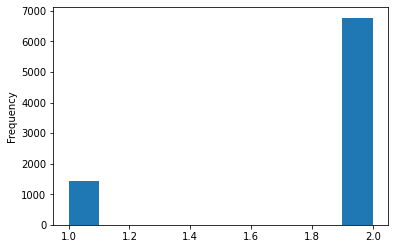

In [85]:
train_2018.loc[(train_2018['bq25'] == '1') & (train_2018['bq25_1'].notnull()) , 'bq25_1'].astype('int').plot.hist()

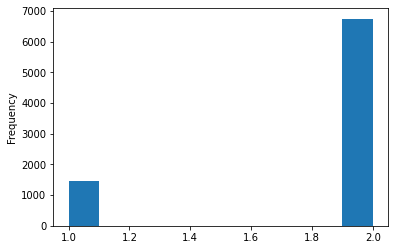

In [86]:
test_2018.loc[(test_2018['bq25'] == '1') & (test_2018['bq25_1'].notnull()) , 'bq25_1'].astype('int').plot.hist()

In [87]:
train_2018.loc[(train_2018['bq25'] == '1') & (train_2018['bq25_1'].isnull()), 'bq25_1'] = '2'
test_2018.loc[(test_2018['bq25'] == '1') & (test_2018['bq25_1'].isnull()), 'bq25_1'] = '2'

In [88]:
print(train_2018['bq25_1'].value_counts())
print(test_2018['bq25_1'].value_counts())

2    6778
1    1463
3       2
Name: bq25_1, dtype: int64
2    6749
1    1470
3       1
Name: bq25_1, dtype: int64


In [89]:
train_2018['bq25_1'].replace('3', '2', inplace = True)
test_2018['bq25_1'].replace('3', '2', inplace = True)

In [90]:
# 결측치 값을 마지막으로 '없음'으로 교체해 준다.
train_2018['bq25_1'].replace(np.nan, '없음', inplace = True)
test_2018['bq25_1'].replace(np.nan, '없음', inplace = True)

1.10 bq26에 대한 결측치 처리 방법

In [91]:
display(train_2018[(train_2018['bq26_1'].isnull())][['bq26_1', 'bq26_1a']])
display(test_2018[(test_2018['bq26_1'].isnull())][['bq26_1', 'bq26_1a']])

,bq26_1,bq26_1a
2938,NaN,3
7480,NaN,2
8171,NaN,3


,bq26_1,bq26_1a
357,NaN,1


In [92]:
train_2018['bq26_1'].unique()

array(['1', '3', '2', '1.0', '2.0', '3.0', nan, 1.0, 2.0, 3.0],
      dtype=object)

In [93]:
train_2018.replace('1.0', '1', inplace = True)
train_2018.replace(1.0, '1', inplace = True)

test_2018.replace('1.0', '1', inplace = True)
test_2018.replace(1.0, '1', inplace = True)

train_2018.replace('2.0', '2', inplace = True)
train_2018.replace(2.0, '2', inplace = True)

test_2018.replace('2.0', '2', inplace = True)
test_2018.replace(2.0, '2', inplace = True)

train_2018.replace('3.0', '3', inplace = True)
train_2018.replace(3.0, '3', inplace = True)

test_2018.replace('3.0', '3', inplace = True)
test_2018.replace(3.0, '3', inplace = True)

train_2018.loc[(train_2018['bq26_1'].isnull()), 'bq26_1'] = '1'
test_2018.loc[(test_2018['bq26_1'].isnull()), 'bq26_1'] = '1'

1.11 bq28_1에 대한 결측치 처리 방법

In [94]:
train_2018.loc[(train_2018['bq28_1'].isnull()), 'bq28_1'] = '없음'
test_2018.loc[(test_2018['bq28_1'].isnull()), 'bq28_1'] = '없음'

1.12 bq29에 대한 결측치 처리 방법

In [95]:
train_2018.loc[(train_2018['bq29'].isnull()), 'bq29'] = '없음'
test_2018.loc[(test_2018['bq29'].isnull()), 'bq29'] = '없음'

1.13 bq30에 대한 결측치 처리 방법

1.14 bq31-33에 대한 결측치 처리 방법

In [96]:
train_2018.loc[(train_2018['bq31'].isnull()), 'bq31'] = '없음'
test_2018.loc[(test_2018['bq31'].isnull()), 'bq31'] = '없음'

train_2018.loc[(train_2018['bq32'].isnull()), 'bq32'] = '없음'
test_2018.loc[(test_2018['bq32'].isnull()), 'bq32'] = '없음'

train_2018.loc[(train_2018['bq33'].isnull()), 'bq33'] = '없음'
test_2018.loc[(test_2018['bq33'].isnull()), 'bq33'] = '없음'

1.15 bq36에 대한 결측치 처리 방법

In [97]:
for index in train_2018.loc[(train_2018['bq36'].notnull()), 'bq36'].value_counts().index:
    print(index)

38.0
35.0
40.0
34.0
37.0
45.0
43.0
36.0
42.0
28.0
30.0
29.0
48.0
32.0
50.0
39.0
33.0
47.0
31.0
46.0
49.0
27.0
44.0
26.0
41.0
53.0
52.0
58.0
54.0
55.0
51.0
25.0
57.0
56.0
59.0
24.0
60.0
23.0
63.0
61.0
62.0
64.0
38
45
40
48
34
22.0
29
33
35
43
36
32
65.0
31
37
27
67.0
30
28
49
55
41
56
39
66.0
42
21.0
70.0
68.0
46
47
52
44
58
50
25
57
26
54
72.0
53
59
20.0
69.0
4.0
51
71.0
24
2
60
61
74.0
3
64
23
76.0
62
63
19.0
77.0
67
4
75.0
72
73.0
79.0
78.0
21
65
66
75
83.0
68
70
82
5.0
80
69
디자이너
22
80.0
85.0
81.0
17


In [98]:
train_2018.loc[(train_2018['bq36'].notnull() & (train_2018['bq36'] == '디자이너'))]

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,cq10,cq11,cq12,cq13,cq14,cq15,cq16,cq17,cq18,cq19,cq20,cq21,cq22,cq23,cq24,cq25,cq26,cq27,cq28,cq29,cq30,cq31,cq32,cq33,cq34,cq35,cq36,cq37,cq38,cq39,...,bq17,bq18,bq19,bq20,bq21,bq221,bq222,bq223,bq25,bq25_1,bq26_1,bq26_1a,bq26_2,bq26_2a,bq26_3,bq26_3a,bq26_4,bq26_4a,bq27,bq28,bq28_1,bq29,bq30,bq31,bq32,bq33,bq34,bq35,bq36,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
8551,18048,5,4,3,3,1,5,2,2,1,1,2,2,2,5,1,1,3,5,1,1,2,1,1,1,1,1,1,1,5,1,1,5,1,5,1,2,3,4,3,...,1,1,1,3,100,1,2,없음,1,2,1,2,1,2,1,2,1,2,2,3,포지션이 희소성이 높고 중요도 또한 높아 원래대로라면 늘어나야 하는 것이 맞지만_경...,배색사,"포토샵, 일러스트레이터 프로그램",없음,없음,컬러리스트는 분야별로 종류가 다양하며 제가 종사하고 있는 분야는 패션입니다._패션 ...,포토샵,"라이트룸 등의 컴퓨터 프로그램""",디자이너,디자이너,색채심리상담사,3,1,48,5,지식재산학,1,1,NaN,415404


count    9070.000000
mean       41.321830
std        11.180402
min         2.000000
25%        33.000000
50%        40.000000
75%        49.000000
max        85.000000
Name: bq36, dtype: float64

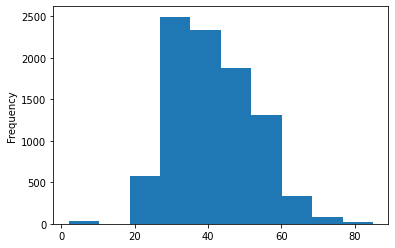

In [99]:
display(train_2018.loc[(train_2018['bq36'].notnull() & (train_2018['bq36'] != '디자이너'))]['bq36'].astype('int').describe())
train_2018.loc[(train_2018['bq36'].notnull() & (train_2018['bq36'] != '디자이너'))]['bq36'].astype('int').plot.hist()

In [100]:
list(set(train_2018.loc[(train_2018['bq36'].notnull() & (train_2018['bq36'] != '디자이너'))]['bq36'].astype('int')))[:10]

[2, 3, 4, 5, 17, 19, 20, 21, 22, 23]

In [101]:
train_2018.loc[(train_2018['bq36'] == '디자이너'), 'bq36'] = train_2018.loc[(train_2018['bq36'].notnull() & (train_2018['bq36'] != '디자이너'))]['bq36'].astype('int').quantile(q = 0.5)
train_2018.loc[(train_2018['bq36'].isnull()), 'bq36'] = train_2018.loc[(train_2018['bq36'].notnull() & (train_2018['bq36'] != '디자이너'))]['bq36'].astype('int').quantile(q = 0.5)
train_2018['bq36'].replace('2', '20', inplace = True)
train_2018['bq36'].replace('3', '30', inplace = True)
train_2018['bq36'].replace('4', '40', inplace = True)
train_2018['bq36'].replace(5.0, '50', inplace = True)

1.16 bq37_1에 대한 결측치 처리 방법

In [102]:
print(train_2018['bq37'].unique())
print(test_2018['bq37'].unique())

['3' '2' '4' '5' '6' '1' '전자전기학' '정보처리' '금속' '이' '전기공학' '전자공학' '시각디자인'
 '공고졸업' '기계' '이과' '전기전자' '전자전기 공학' '금속기계' '항해학과' '금속가공' '기계과' '전기'
 '전자전기공학' '기계공학' '세무회계' '멀티미디어' '자동차' '디자이너' '기계학']
['1' '4' '3' '2' '5' '6' '공고졸업' '금속' '전기' '이과' '전기공학' '전산응용가공' '신소재디자인'
 '인문' '기계' '기계학' '항공우주 시스템공학' '전기전자' nan '사회복지학' '정보통신학' '이' '간호학과'
 '신소재공학' '전기전자학' '시각디자인학' '전자공학' '기계과']


In [103]:
print(train_2018[(train_2018['bq37'] == '1')].shape)
print(test_2018[(test_2018['bq37'] == '1')].shape)

(300, 131)
(277, 130)


In [104]:
train_2018.loc[(train_2018['bq37'] == '1'), 'bq37_1'] = '없음'
test_2018.loc[(test_2018['bq37'] == '1'), 'bq37_1'] = '없음'

In [105]:
train_2018.loc[(train_2018['bq37_1'].isnull()), 'bq37_1'] = '없음'
test_2018.loc[(test_2018['bq37_1'].isnull()), 'bq37_1'] = '없음'

1.16.1 bq37에 이상한 값들 매핑

In [123]:
test_2018.loc[(test_2018['bq37_1'].isnull()), 'bq37_1'] = '없음'

In [106]:
haha = ['1', '2', '3', '4', '5', '6']
train_indexs = []
for index in train_2018.index:
    value = train_2018.loc[index, 'bq37']
    
    if value not in haha:
        train_indexs.append(index)
        if value != '공고졸업':
            train_2018.loc[index, 'bq37'] = '4'
            train_2018.loc[index, 'bq37_1'] = value
        else:
            train_2018.loc[index, 'bq37'] = '2'
            train_2018.loc[index, 'bq37_1'] = value
            
for index in test_2018.index:
    value = test_2018.loc[index, 'bq37']
    
    if value not in haha:
        if value != '공고졸업':
            test_2018.loc[index, 'bq37'] = '4'
            test_2018.loc[index, 'bq37_1'] = value
        else:
            test_2018.loc[index, 'bq37'] = '2'
            test_2018.loc[index, 'bq37_1'] = value     

In [107]:
print(train_2018['bq37'].unique())
print(test_2018['bq37'].unique())

['3' '2' '4' '5' '6' '1']
['1' '4' '3' '2' '5' '6']


In [108]:
display(train_2018.loc[train_indexs, ['bq37', 'bq37_1']])

,bq37,bq37_1
456,4,전자전기학
1253,4,정보처리
1548,4,금속
1628,4,이
1946,4,전기공학
2938,4,전자공학
3064,4,시각디자인
3505,2,공고졸업
4000,4,기계
4076,4,이과


In [109]:
train_2018.loc[(train_2018['bq38_1']=='5'),'bq38'] = '1'

1.19 bq39 해당하는 결측치 처리 방법

In [110]:
print(train_2018[(train_2018['bq39'].isnull())]['bq38_2'].value_counts())
print(test_2018[(test_2018['bq39'].isnull())]['bq38_2'].value_counts())

6    824
5    387
7     50
Name: bq38_2, dtype: int64
6    840
5    400
7     55
Name: bq38_2, dtype: int64


In [111]:
test_2018['bq38_1'].replace('70', np.nan, inplace = True)

In [112]:
train_2018.loc[(train_2018['bq38_1'] == 2) & (train_2018['bq39'].isnull())] = '3'
test_2018.loc[(test_2018['bq38_1'] == 2) & (test_2018['bq39'].isnull())] = '3'

In [113]:
train_2018 = train_2018.drop(columns = ['bq41_1', 'bq41_2', 'bq41_3'])
test_2018 = test_2018.drop(columns = ['bq41_1', 'bq41_2', 'bq41_3'])

In [114]:
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")


idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

In [126]:
# train_2018.to_csv("220114_know2018_train.csv")
test_2018.to_csv("220114_know2018_test.csv")